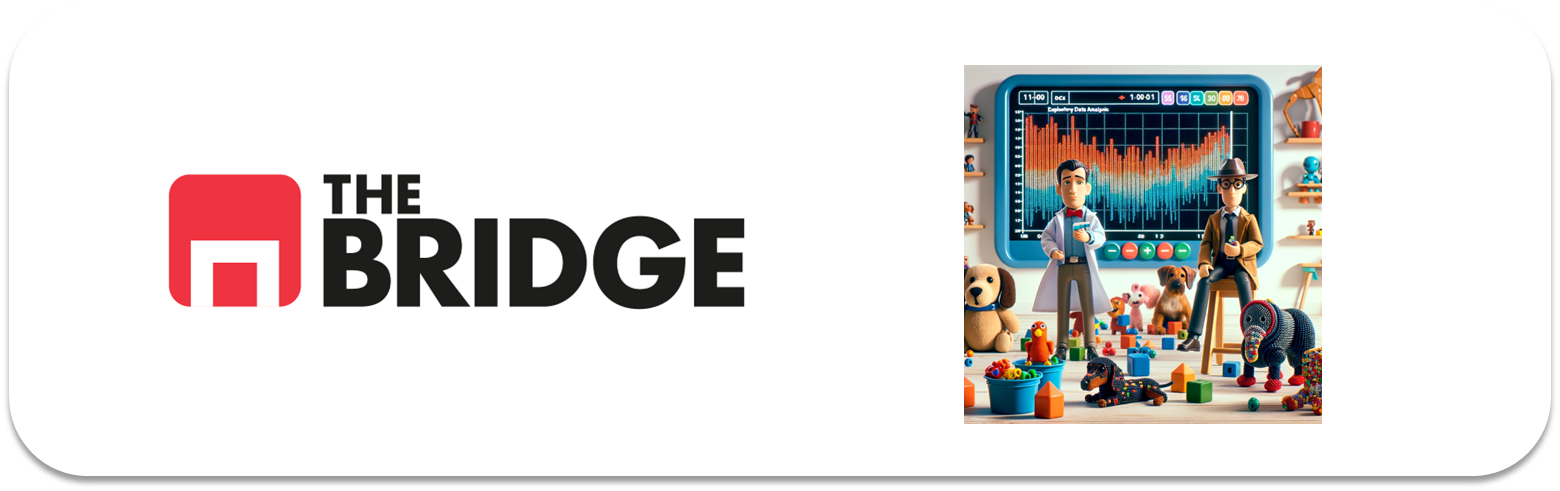

## PRACTICA OBLIGATORIA: ANÁLISIS MULTIVARIANTE

* La práctica obligatoria de esta unidad consiste en completar el análisis del dataset del Titanic, dirigido por una serie de preguntas, y de terminar de analizar algunos aspectos del dataset de viajes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from bootcampviztools import *


## #1 TITANIC

### #1.1

Carga en un dataframe el dataset del titanic, que está en la ruta "./data/titanic.csv".

In [44]:
df_titanic = pd.read_csv("./data/titanic.csv")
df_titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### #1.2

Deshazte de las columnas "deck", "survived", "pclass" y "embarked" porque no las emplearemos, la primera por su cantidad de nulos y el resto porque son variantes de otras que ya existen y cuyos valores resultan más expresivos a la hora de hacer un análisis. 

In [45]:
df_titanic = df_titanic.drop(['survived','deck','pclass','embarked'], axis=1)

### #1.3

Suma las columnas "parch" y "sibsp" para tener el número de parientes de cada pasajero, guarda el resultado en otra columna "family_members", luego deshazte de "parch" y "sibsp"

In [46]:
df_titanic['family_members'] = df_titanic['parch'] + df_titanic['sibsp']
df_titanic = df_titanic.drop(['sibsp','parch'], axis=1)
df_titanic

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,8.0500,Third,man,True,Southampton,no,True,0
...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,13.0000,Second,man,True,Southampton,no,True,0
887,female,19.0,30.0000,First,woman,False,Southampton,yes,True,0
888,female,NaN,23.4500,Third,woman,False,Southampton,no,False,3
889,male,26.0,30.0000,First,man,True,Cherbourg,yes,True,0


### #1.4

Imputa la moda a los valores nulos de "embark_town"

In [47]:
df_titanic['embark_town'].fillna(df_titanic['embark_town'].mode()[0], inplace = True)

/var/folders/pj/f8hslcw56411qpfnn2sxfqrm0000gn/T/ipykernel_32498/2636006009.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_titanic['embark_town'].fillna(df_titanic['embark_town'].mode()[0], inplace = True)


### #1.5

Imputa la media a los valores faltantes de "age", si quieres puedes hacer algo más preciso (por ejemplo considerando además la columna "who")

In [59]:
age_medias = df_titanic.groupby('who')['age'].transform('mean')
df_titanic['age'] = df_titanic['age'].fillna(age_medias)


### 1.6

Realiza los análisis bivariantes o multivariantes que necesites, así como los test de hipótesis necesarios para contestar a las siguientes preguntas. Nota: utiliza la variable "alive" para saber si un pasajero sobrevivió o no:

In [62]:
df_titanic

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,8.0500,Third,man,True,Southampton,no,True,0
...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,13.0000,Second,man,True,Southampton,no,True,0
887,female,19.0,30.0000,First,woman,False,Southampton,yes,True,0
888,female,32.0,23.4500,Third,woman,False,Southampton,no,False,3
889,male,26.0,30.0000,First,man,True,Cherbourg,yes,True,0


1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

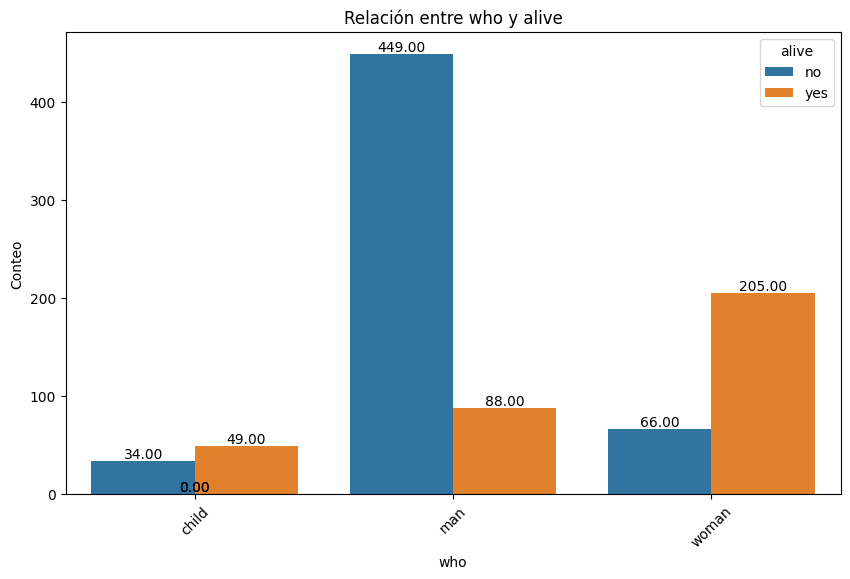

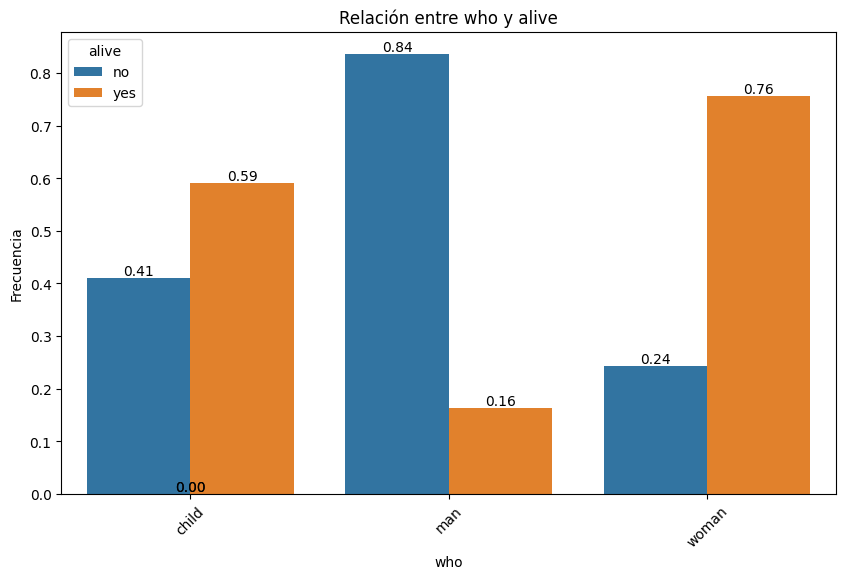

In [67]:
plot_categorical_relationship_fin(df_titanic, "who","alive", show_values= True)
plot_categorical_relationship_fin(df_titanic, "who","alive", relative_freq = True, show_values = True)

In [93]:
tabla_contingencia = pd.crosstab(df_titanic['alive'], df_titanic['who'])

from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 283.923050324233
P-Value: 2.2227620817798914e-62
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[ 51.14141414 330.87878788 166.97979798]
 [ 31.85858586 206.12121212 104.02020202]]


- Sobrevivieron más mujeres que hombres y niños, pero en términos relativos, esa diferencia tan grande para mujeres no se distancia tanto de los niños.
- Si eras mujer era mucho más probable que hubieras sobrevivido que si fueras hombre.

In [76]:
filtro = (df_titanic['who'] == "child")
df_titanic.loc[filtro, 'adult'] = "no"
filtro = (df_titanic['who'] != "child")
df_titanic.loc[filtro, 'adult'] = "yes"

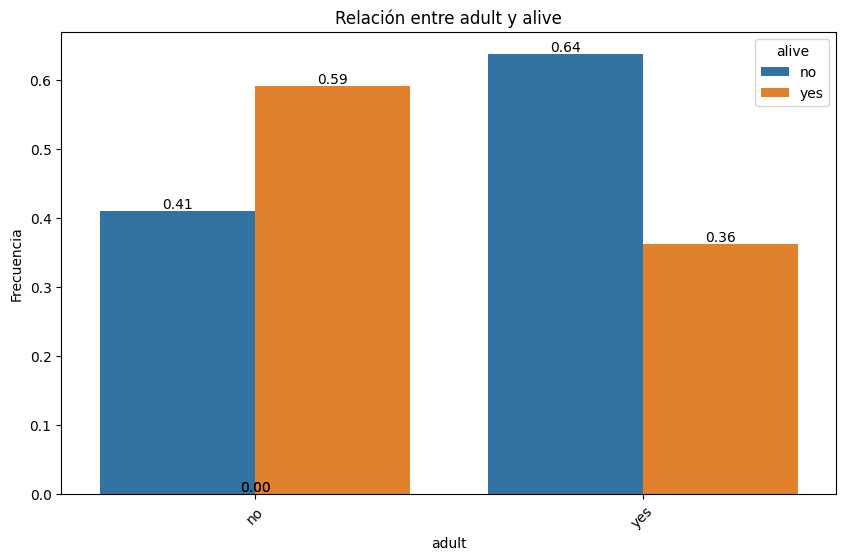

In [77]:
plot_categorical_relationship_fin(df_titanic, "adult","alive", relative_freq = True, show_values = True)

In [94]:
tabla_contingencia = pd.crosstab(df_titanic['alive'], df_titanic['adult'])

from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 15.556993340077092
P-Value: 8.005497211300105e-05
Grados de Libertad: 1
Tabla de Frecuencias Esperadas:
 [[ 51.14141414 497.85858586]
 [ 31.85858586 310.14141414]]


- Si eres adulto es mucho más probable que murieras que si eres niño.

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

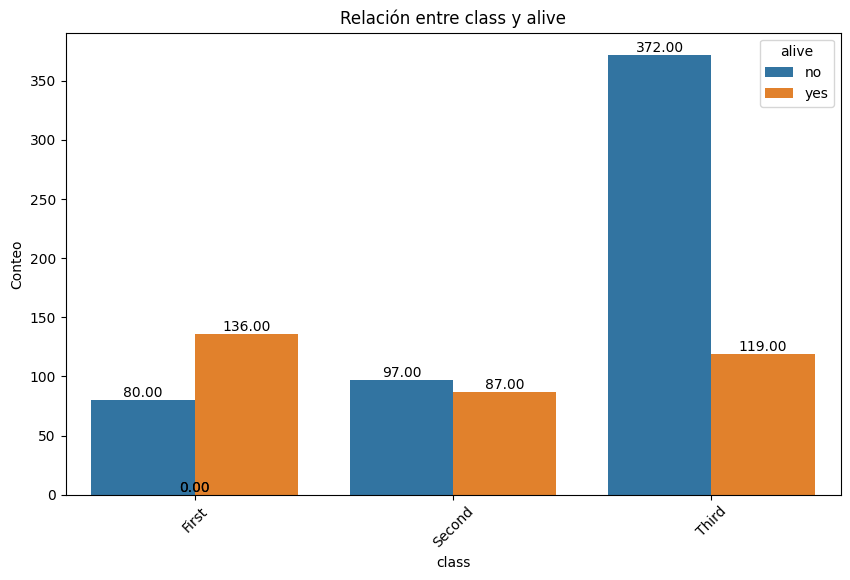

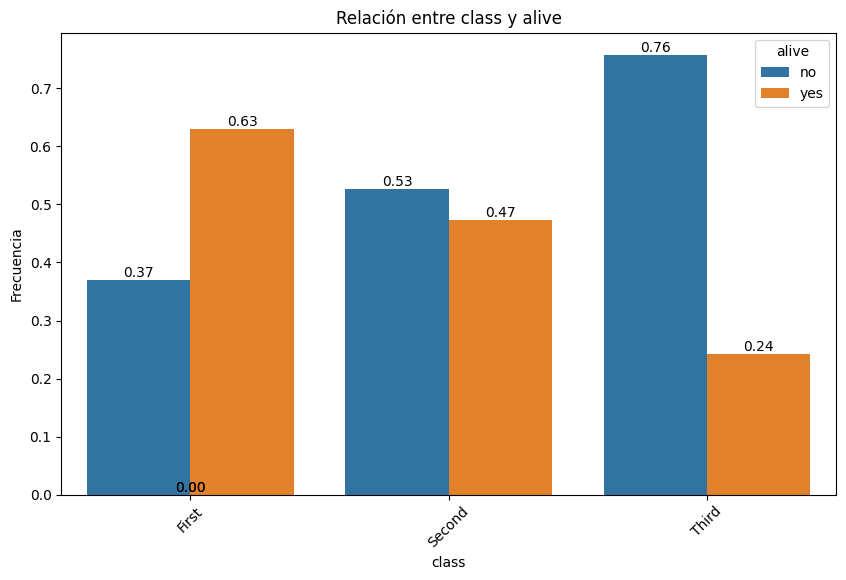

In [78]:
plot_categorical_relationship_fin(df_titanic, "class","alive", show_values= True)
plot_categorical_relationship_fin(df_titanic, "class","alive", relative_freq = True, show_values = True)

In [95]:
tabla_contingencia = pd.crosstab(df_titanic['alive'], df_titanic['class'])

from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 102.88898875696056
P-Value: 4.549251711298793e-23
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[133.09090909 113.37373737 302.53535354]
 [ 82.90909091  70.62626263 188.46464646]]


- Se salvó un 63% de las personas que viajaban en primera clase, la mitad de los que viajaban en segunda, y apenas un cuarto de los que viajaban en tercera.
- Existe una correlación que a peor era la clase en la que viajabas, más probabilidades había de morir.

3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

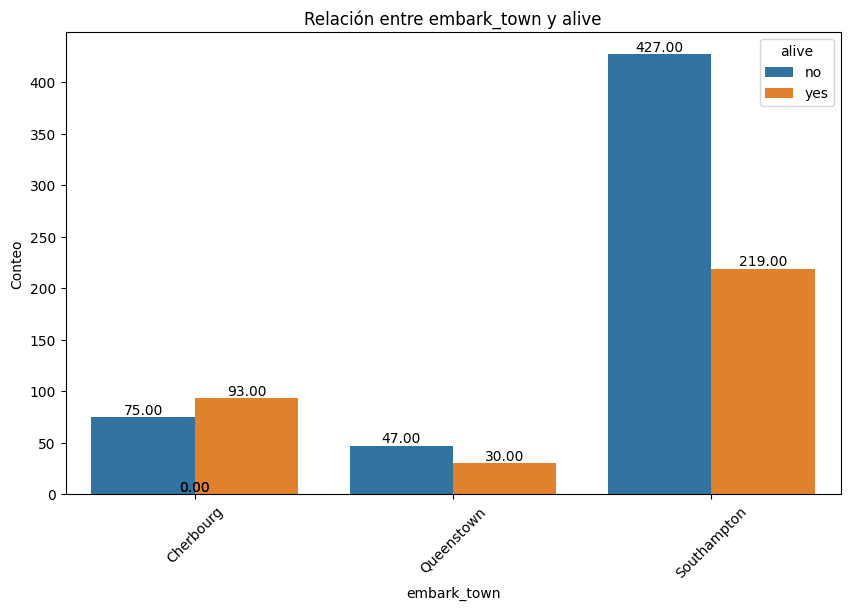

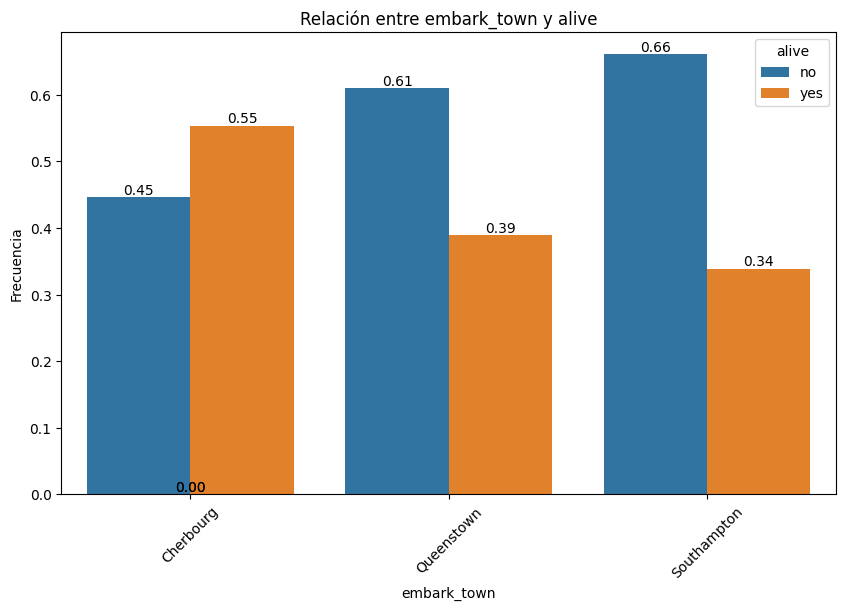

In [79]:
plot_categorical_relationship_fin(df_titanic, "embark_town","alive", show_values= True)
plot_categorical_relationship_fin(df_titanic, "embark_town","alive", relative_freq = True, show_values = True)

- La mayor muestra está en Southampton, donde murieron una cantidad relativa parecida al total.
- Solo encontramos en Cherbourg una mayor cantidad de supervivientes que de fallecidos (puede que ligado a que los viajantes de allí tuvieran mejor clase)

In [96]:
tabla_contingencia = pd.crosstab(df_titanic['alive'], df_titanic['embark_town'])

from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 25.964452881874784
P-Value: 2.3008626481449577e-06
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[103.51515152  47.44444444 398.04040404]
 [ 64.48484848  29.55555556 247.95959596]]


4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

(2,)


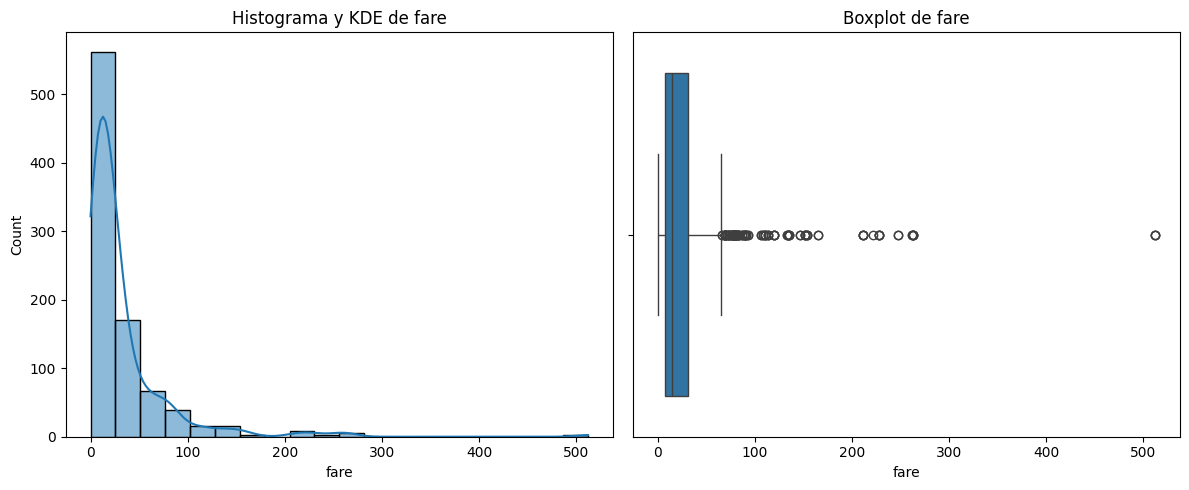

In [82]:
plot_combined_graphs(df_titanic,["fare"], bins = 20)

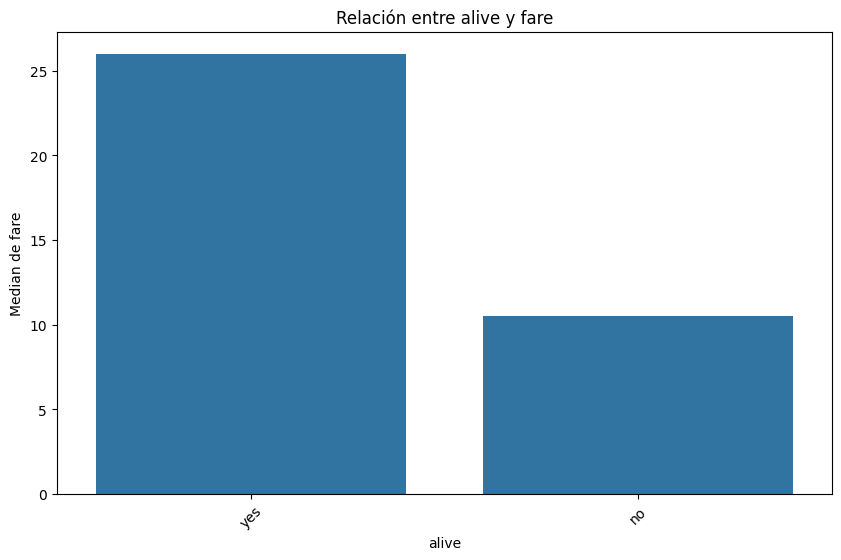

In [84]:
plot_categorical_numerical_relationship(df_titanic,"alive","fare", measure = "median")

- La mediana del precio del billete de los supervivientes es bastante mayor que el precio de los que fallecieron

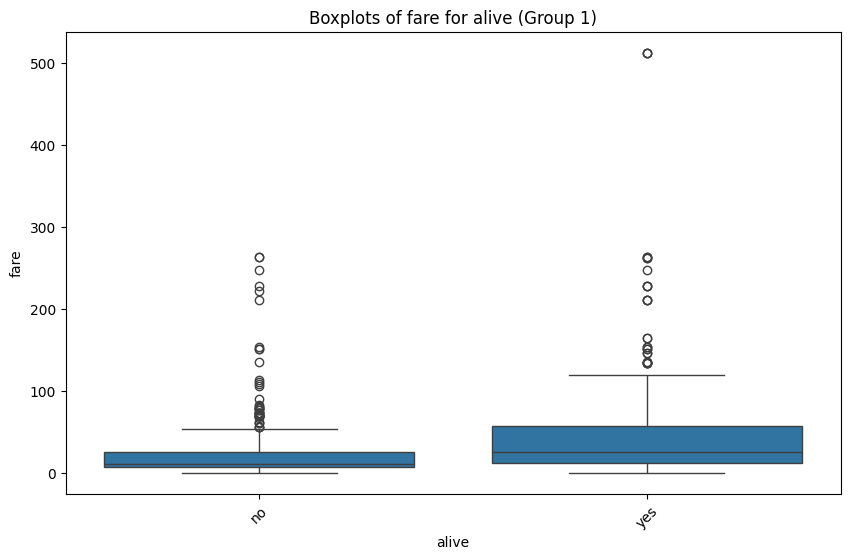

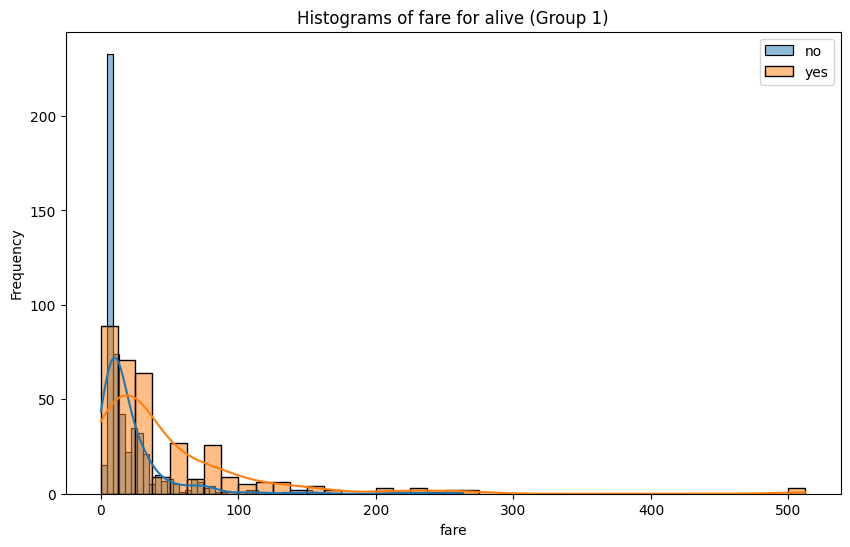

In [88]:
plot_grouped_boxplots(df_titanic,"alive","fare")
plot_grouped_histograms(df_titanic,"alive", "fare", 2)

- Va de acuerdo con los resultados de los boxplots, en el que el percentil 75 del precio de los supervivientes se encuentra además mucho más elevado que el de los fallecidos

In [97]:
from scipy.stats import mannwhitneyu 
grupo_a = df_titanic.loc[df_titanic.alive == "yes"]["fare"]
grupo_b = df_titanic.loc[df_titanic.alive == "no"]["fare"]

u_stat, p_valor = mannwhitneyu(grupo_a, grupo_b)

print("Estadístico U:", u_stat)
print("Valor p:", p_valor)

Estadístico U: 129951.5
Valor p: 4.553477179250237e-22


- Concluimos que sí hay una correlación entre el precio del billete y la supervivencia del viajero

5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?


In [89]:
df_titanic[df_titanic['fare'] == 0]

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members,adult
179,male,36.000000,0.0,Third,man,True,Southampton,no,True,0,yes
263,male,40.000000,0.0,First,man,True,Southampton,no,True,0,yes
271,male,25.000000,0.0,Third,man,True,Southampton,yes,True,0,yes
277,male,33.173123,0.0,Second,man,True,Southampton,no,True,0,yes
302,male,19.000000,0.0,Third,man,True,Southampton,no,True,0,yes
413,male,33.173123,0.0,Second,man,True,Southampton,no,True,0,yes
466,male,33.173123,0.0,Second,man,True,Southampton,no,True,0,yes
481,male,33.173123,0.0,Second,man,True,Southampton,no,True,0,yes
597,male,49.000000,0.0,Third,man,True,Southampton,no,True,0,yes
633,male,33.173123,0.0,First,man,True,Southampton,no,True,0,yes


- Puede que sean datos rellenados con un 0 de personas de las que se desconoce el precio de ese billete.

In [90]:
df_titanic[df_titanic['fare'] > 500]

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members,adult
258,female,35.0,512.3292,First,woman,False,Cherbourg,yes,True,0,yes
679,male,36.0,512.3292,First,man,True,Cherbourg,yes,False,1,yes
737,male,35.0,512.3292,First,man,True,Cherbourg,yes,True,0,yes


- Las personas que más pagaron por sus billetes iban todas en primera clase y sobrevivieron.

6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

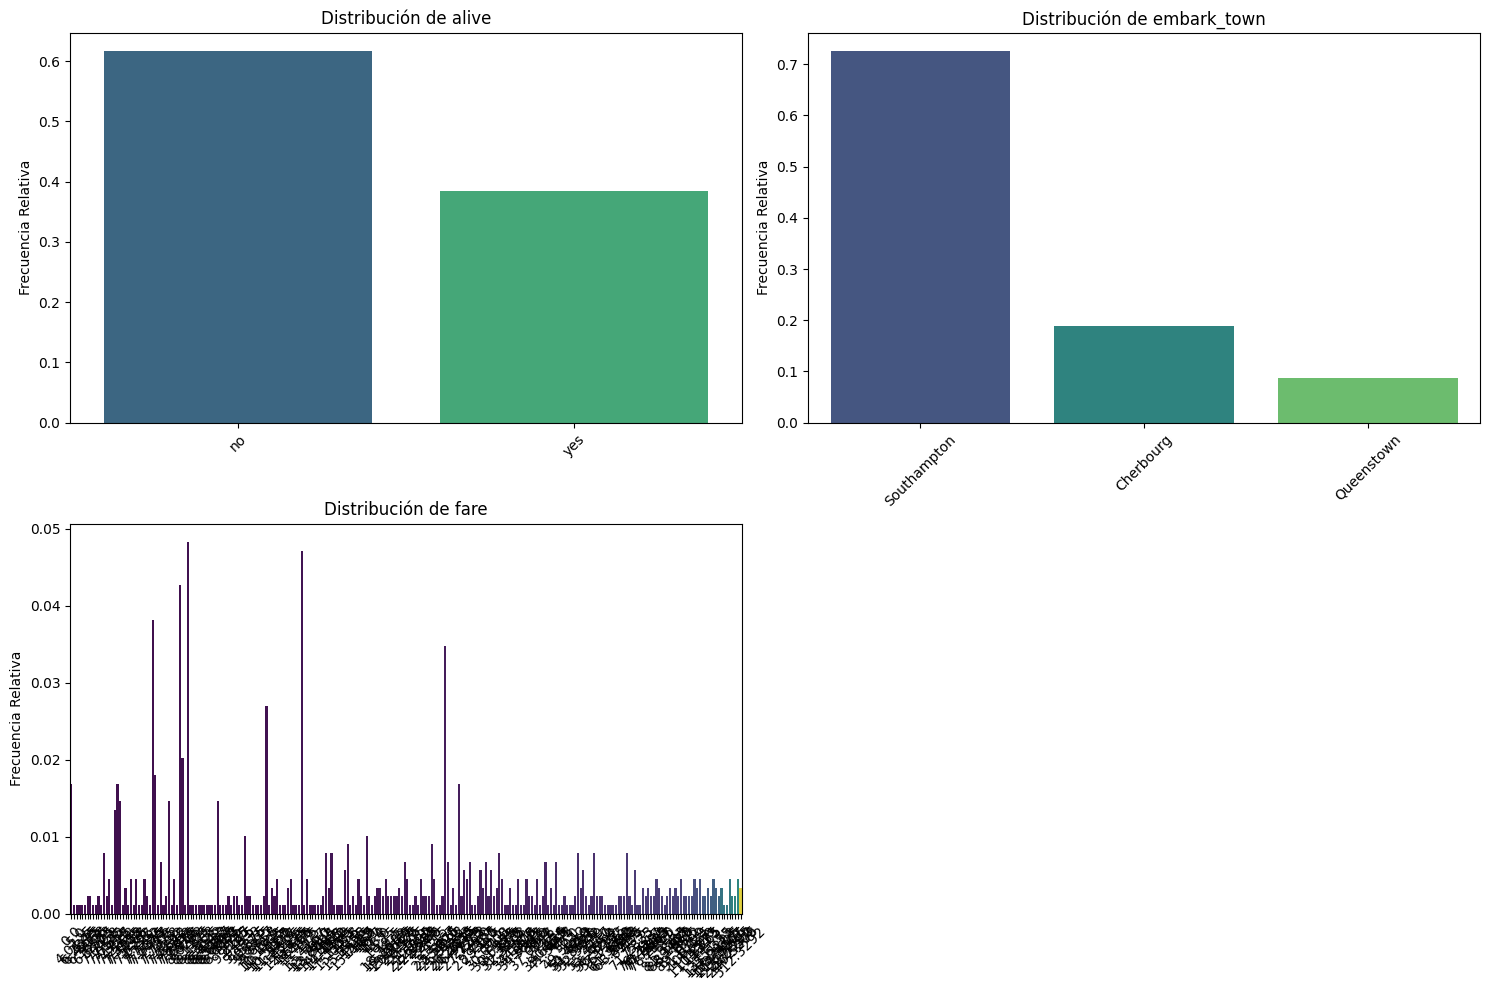

In [136]:
pinta_distribucion_categoricas(df_titanic,["alive","embark_town", "fare"], relativa = True)

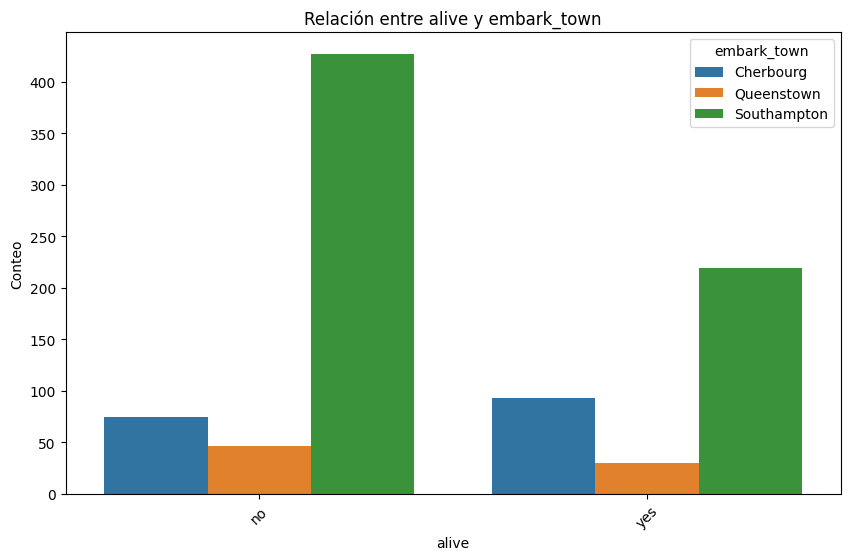

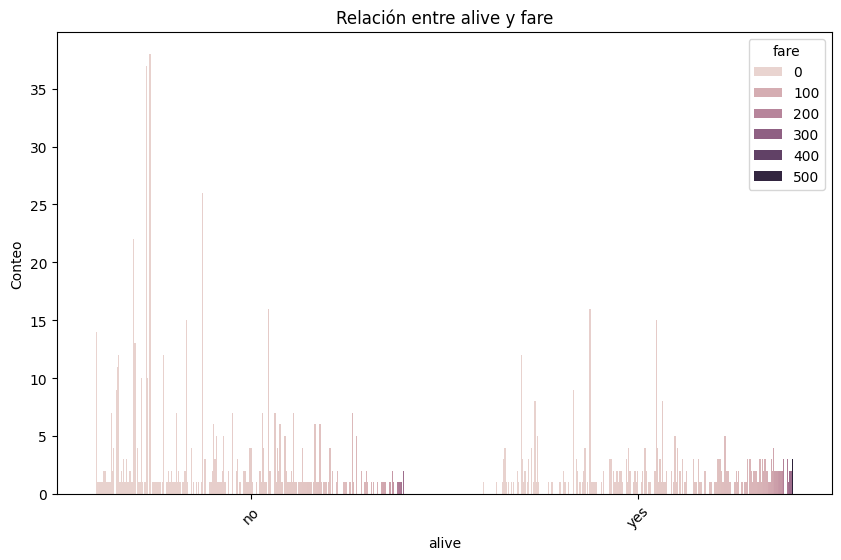

In [138]:
plot_categorical_relationship_fin(df_titanic,"alive","embark_town")
plot_categorical_relationship_fin(df_titanic,"alive","fare")

In [139]:
col_directora = "alive"
col_1 = "embark_town"
col_2 = "fare"
diccionario_multivariante = {}
for valor in df_titanic[col_directora].unique():
    diccionario_multivariante[valor] = df_titanic.loc[df_titanic[col_directora] == valor,[col_2,col_1]]

Respuesta no:


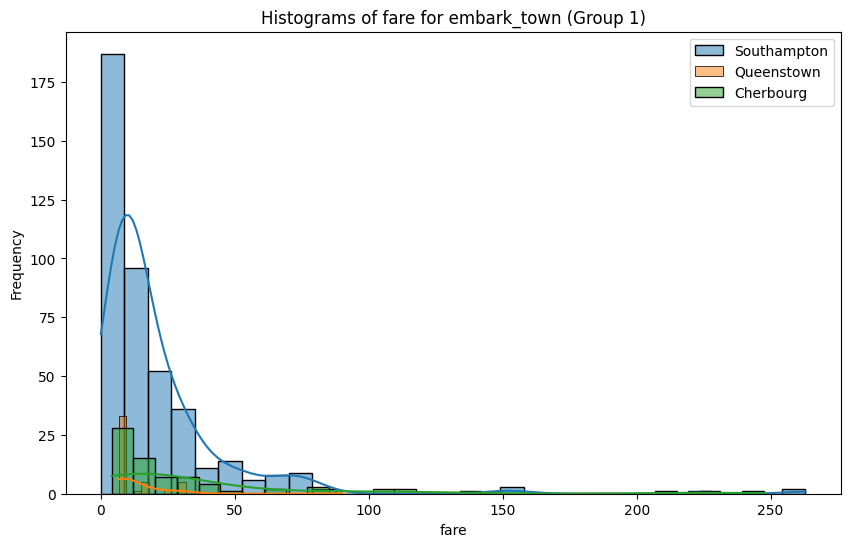

Respuesta yes:


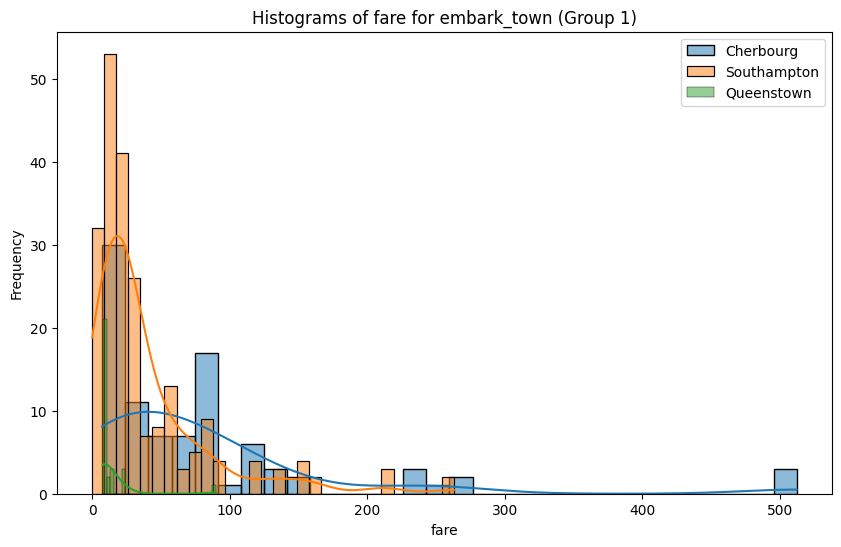

In [140]:

for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    plot_grouped_histograms(df_datos,col_1,col_2, group_size=3, bins = 30)


- Vagamente se puede ver que a más pagaras más probabilidades de sobrevivir en las 3 ciudades de embarque.

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

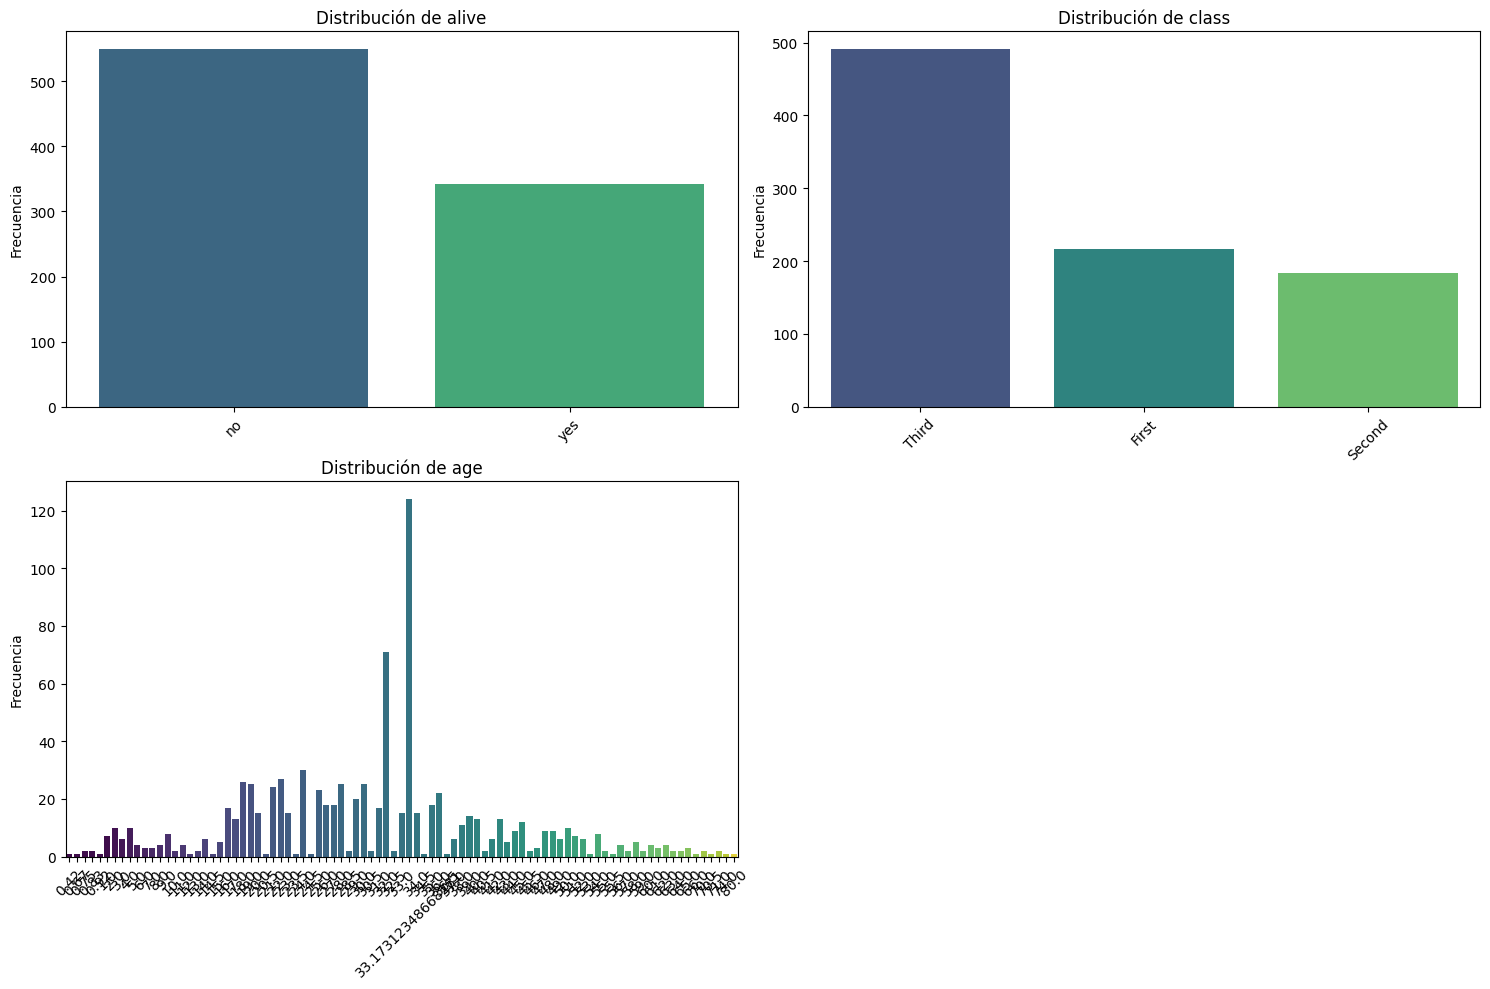

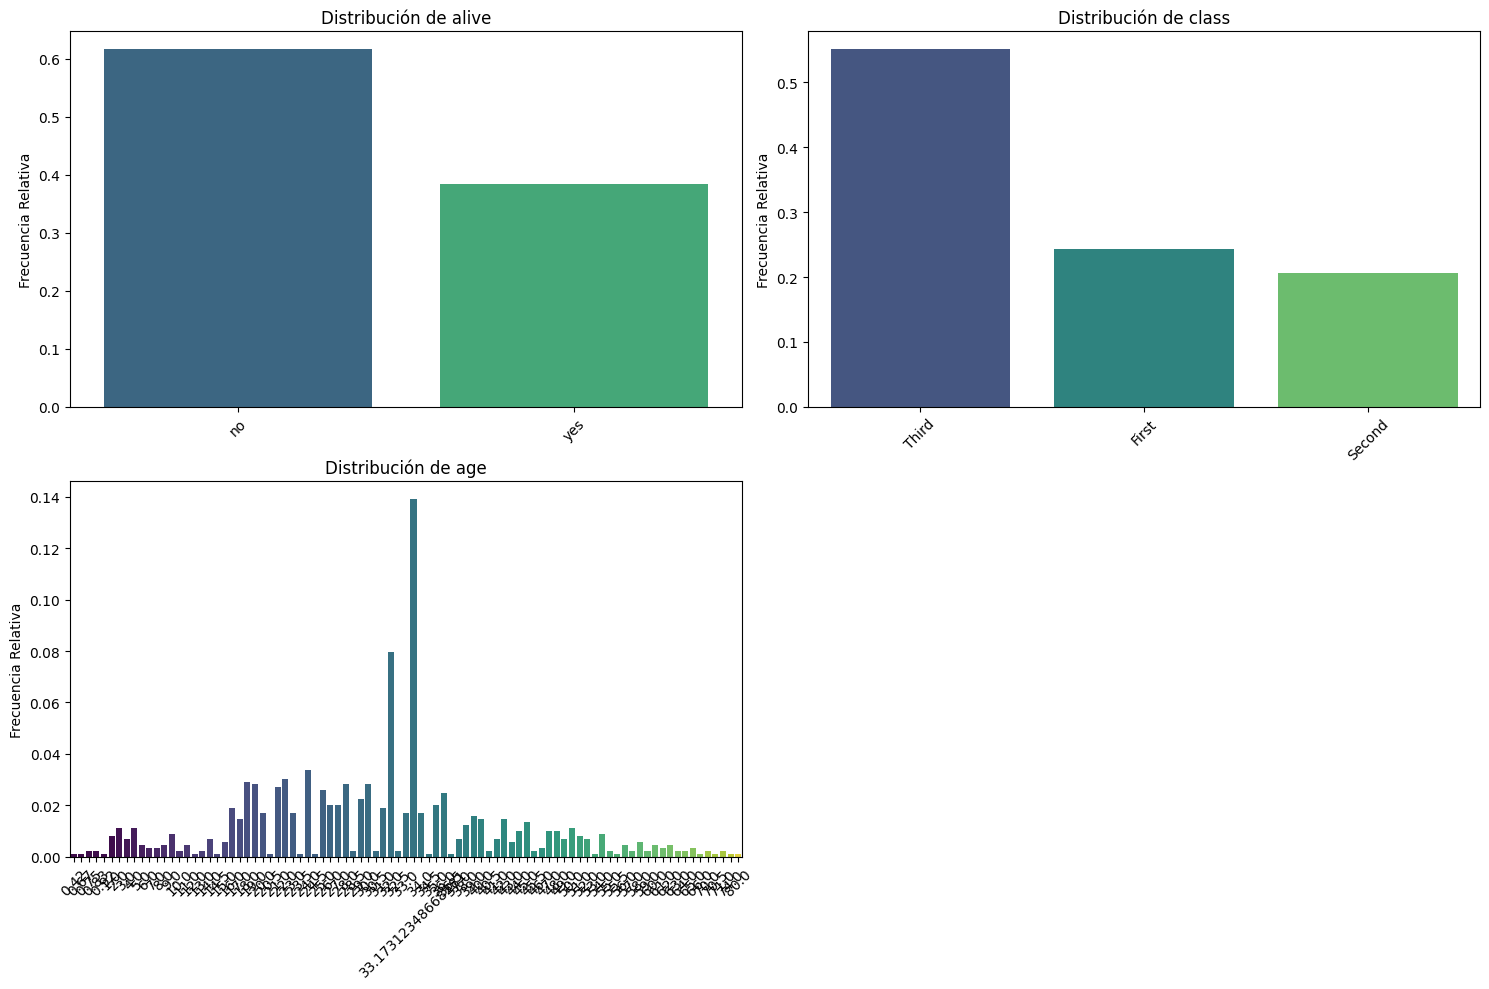

In [135]:
pinta_distribucion_categoricas(df_titanic,["alive","class", "age"])
pinta_distribucion_categoricas(df_titanic,["alive","class", "age"], relativa= True)

Respuesta no:


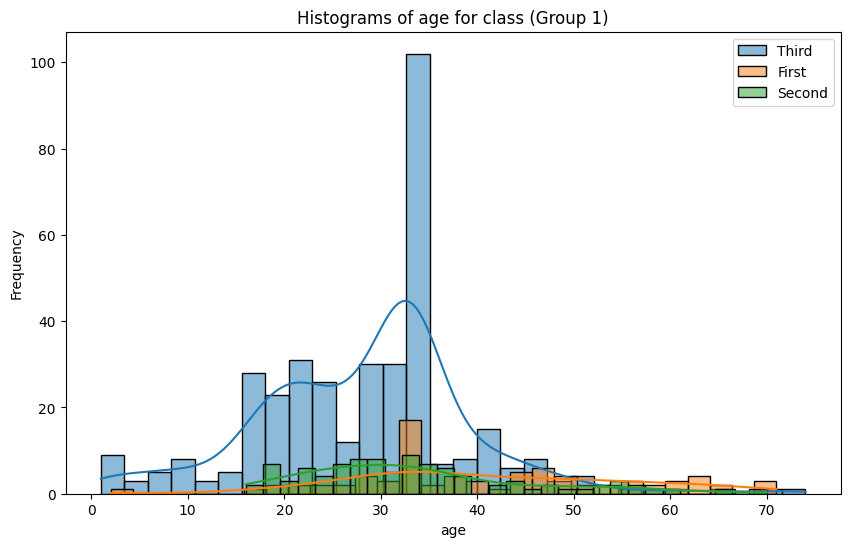

Respuesta yes:


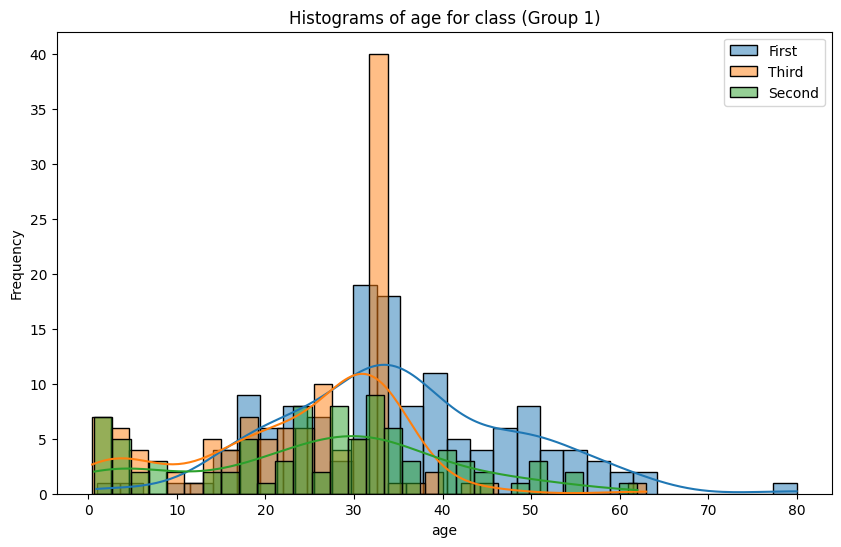

In [141]:
col_directora = "alive"
col_1 = "class"
col_2 = "age"
diccionario_multivariante = {}
for valor in df_titanic[col_directora].unique():
    diccionario_multivariante[valor] = df_titanic.loc[df_titanic[col_directora] == valor,[col_2,col_1]]
    
for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    plot_grouped_histograms(df_datos,col_1,col_2,group_size=3, bins = 30)

- Las personas de mediana edad de tercera clase son las mayores víctimas del naufragio.
- Para las personas que sobrevivieron, se ve cierto parecido entre las clases.

8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

Respuesta no:


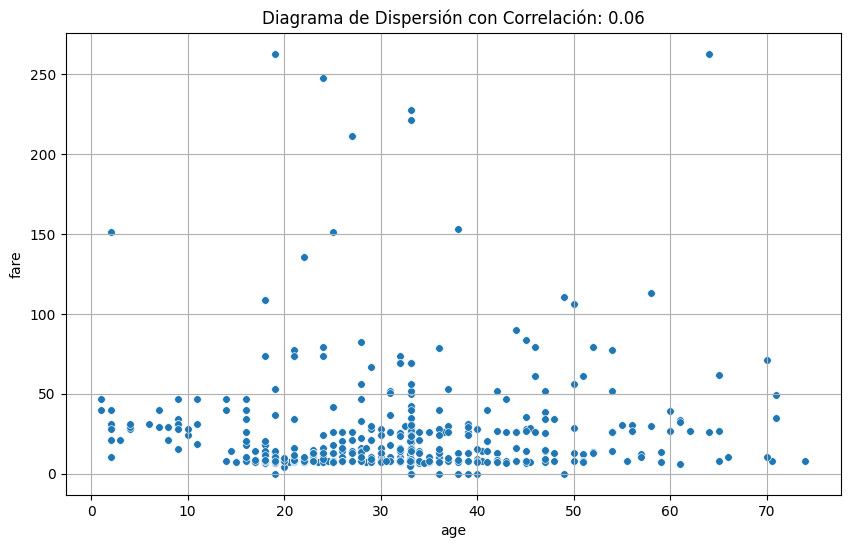

Respuesta yes:


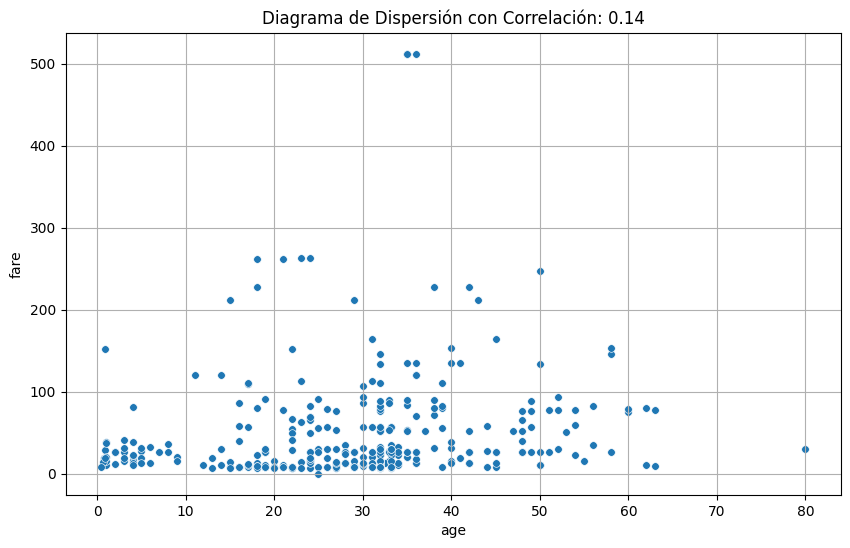

In [155]:
columnas = ["fare","alive","age"] 
col_directora = "alive"
col_1 = "fare"
col_2 = "age"
diccionario_multivariante = {}
for valor in df_titanic[col_directora].unique():
    diccionario_multivariante[valor] = df_titanic.loc[df_titanic[col_directora] == valor,[col_2,col_1]] 

for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    grafico_dispersion_con_correlacion(df_datos,col_2,col_1, tamano_puntos=30, mostrar_correlacion= True)

- No se ve una correlación clara entre la supervivencia, la edad y el precio a la vez

## #2 Viajes

El objetivo en este caso no es tanto hacer un montón de análisis sino de completar lo que quedó pendiente en el workout y de entender cómo de un dataset podemos obtener preguntas o hipótesis interesantes (si las hay)

### #2.1 

Carga el dataset de viajes del mes de junio. Repite el análisis bivariante entre las variables "Aircompany" e "Ingresos", mostrando previamente los viajes por compañía aérea. ¿Qué situación llamativa nos surgió? (Ten en cuenta que somos el departamenteo de DataScience de TabarAir)

In [157]:
df_air_jun = pd.read_csv("./data/dataset_viajes_jun23.csv")
df_air_jun

,aircompany,origen,destino,distancia,avion,con_escala,consumo_kg,duracion,ingresos,id_vuelo,mes
0,Airnar,París,Ginebra,411,Boeing 737,False,1028.691900,51,14232.65,Air_PaGi_10737,Jun23
1,FlyQ,Bali,Roma,12738,Boeing 737,True,33479.132544,1167,468527.19,Fly_BaRo_10737,Jun23
2,TabarAir,Ginebra,Los Angeles,9103,Airbus A380,False,109439.907200,626,584789.19,Tab_GiLo_11380,Jun23
3,MoldaviAir,París,Cincinnati,6370,Boeing 737,False,17027.010000,503,233342.51,Mol_PaCi_10737,Jun23
4,TabarAir,Cincinnati,Roma,7480,Boeing 747,False,86115.744000,518,438535.07,Tab_CiRo_10747,Jun23
...,...,...,...,...,...,...,...,...,...,...,...
595,PamPangea,Bali,Londres,12553,Boeing 737,True,33310.138680,1153,442668.52,Pam_BaLo_10737,Jun23
596,Airnar,Cádiz,París,1447,Airbus A380,False,17229.139600,116,87307.63,Air_CaPa_11380,Jun23
597,Airnar,Los Angeles,Cádiz,9373,Boeing 737,False,23231.917800,731,339943.47,Air_LoCa_10737,Jun23
598,FlyQ,Barcelona,Bali,13058,Boeing 747,True,144766.211200,1070,752212.98,Fly_BaBa_10747,Jun23


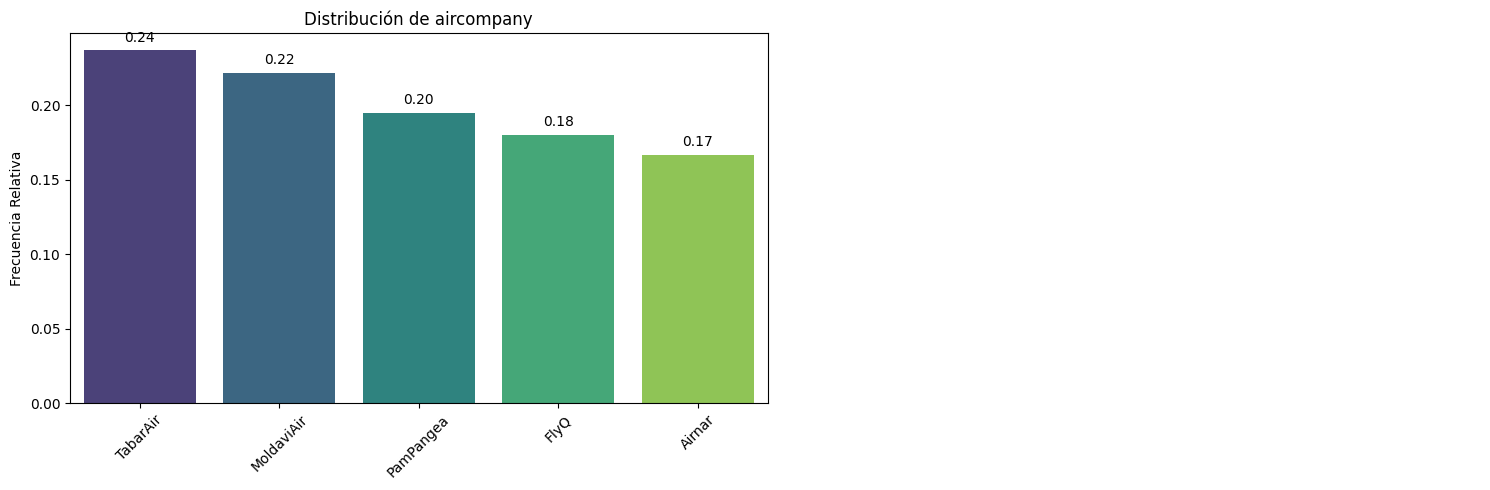

(2,)


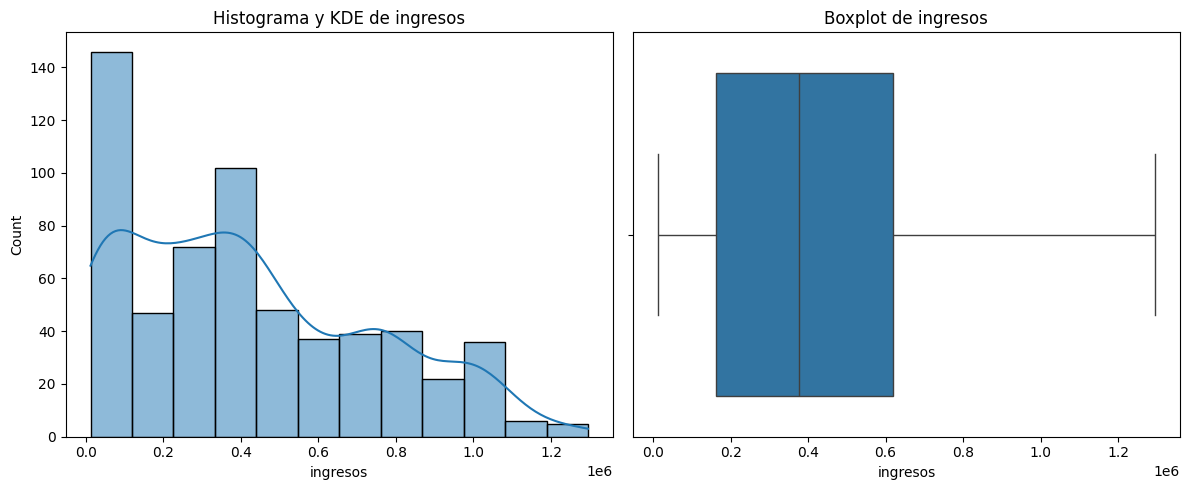

In [162]:
pinta_distribucion_categoricas(df_air_jun,["aircompany"], relativa= True, mostrar_valores= True)
plot_combined_graphs(df_air_jun,["ingresos"])

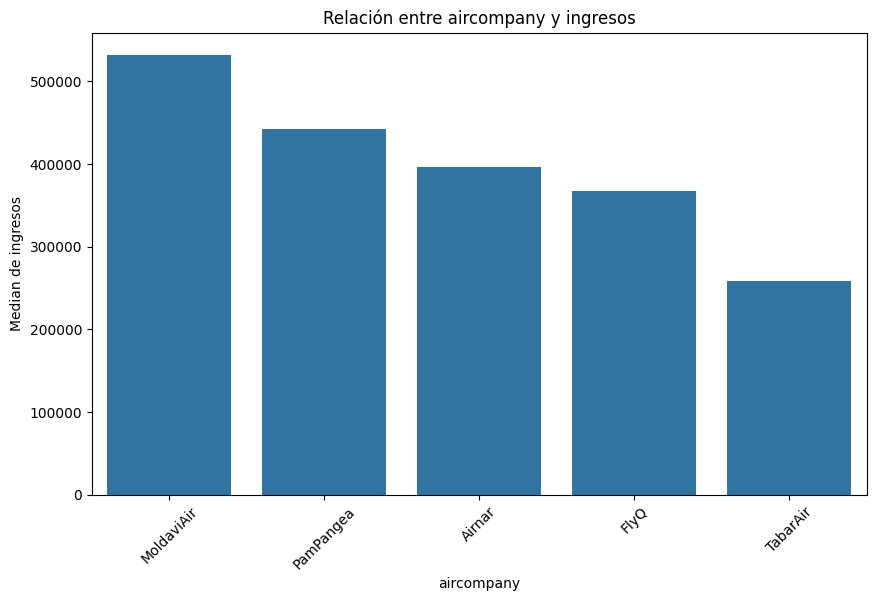

In [163]:
plot_categorical_numerical_relationship(df_air_jun,"aircompany","ingresos", measure = "median")

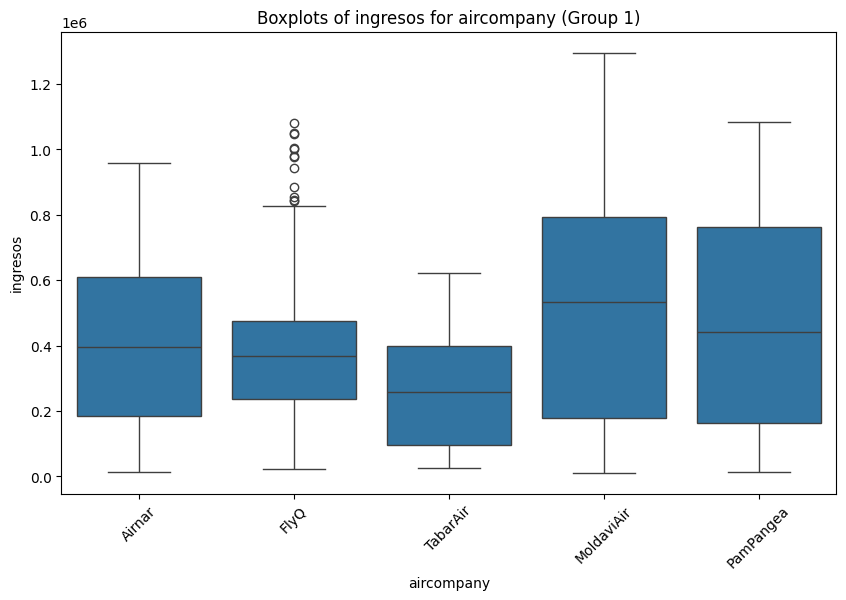

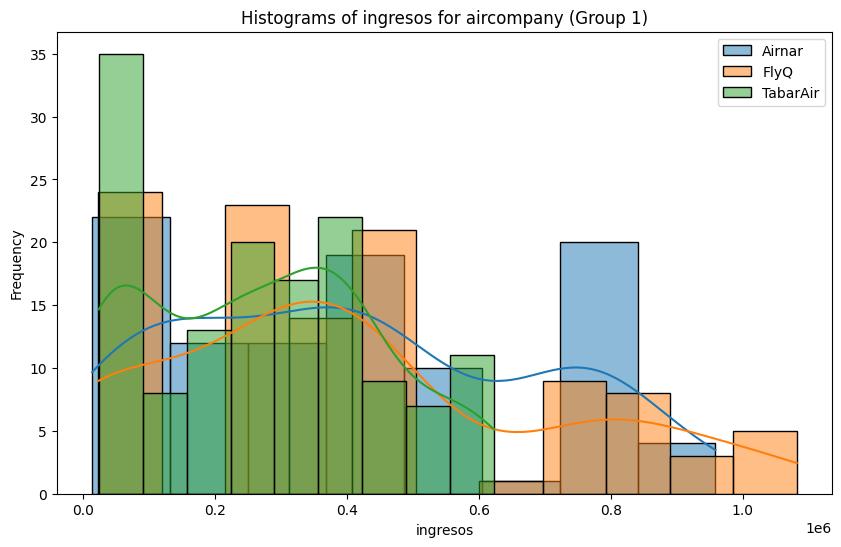

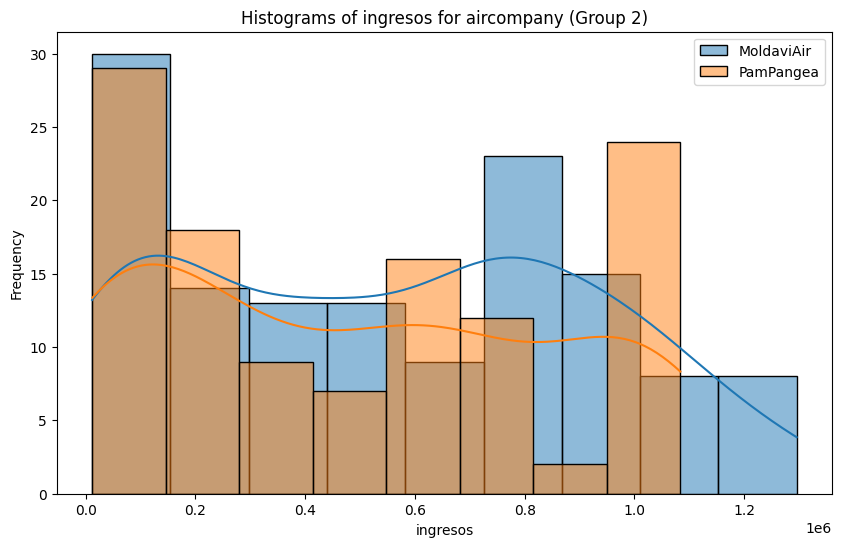

In [166]:
plot_grouped_boxplots(df_air_jun,"aircompany","ingresos")
plot_grouped_histograms(df_air_jun,"aircompany", "ingresos", 3)

In [167]:
df_air_jun.groupby("aircompany")["ingresos"].describe()

,count,mean,std,min,25%,50%,75%,max
aircompany,,,,,,,,
Airnar,100.0,405293.978200,269583.848420,14232.65,185270.6000,396764.220,608356.1225,958617.02
FlyQ,108.0,401619.008056,295633.712828,23498.34,237556.9525,366970.685,473901.4325,1081702.91
MoldaviAir,133.0,548077.209098,374577.838426,11797.85,178872.9000,532426.220,794055.4100,1295515.83
PamPangea,117.0,478417.048718,364458.092328,12383.21,163124.5300,442668.520,763079.0200,1083591.01
TabarAir,142.0,271042.230282,177006.035877,24289.53,95620.5075,258379.745,398147.1925,623089.41


- Desde TabarAir somos la compañía que más vuelos realiza y que menos ingresa.
- Estos datos se aprecian claramente en los boxplots y los números al final

### #2.2

Repite el análisis multivariante entre "ingresos","distancias" y "consumo_kg". ¿Qué veíamos que parecía también muy prometedor?

(3, 2)


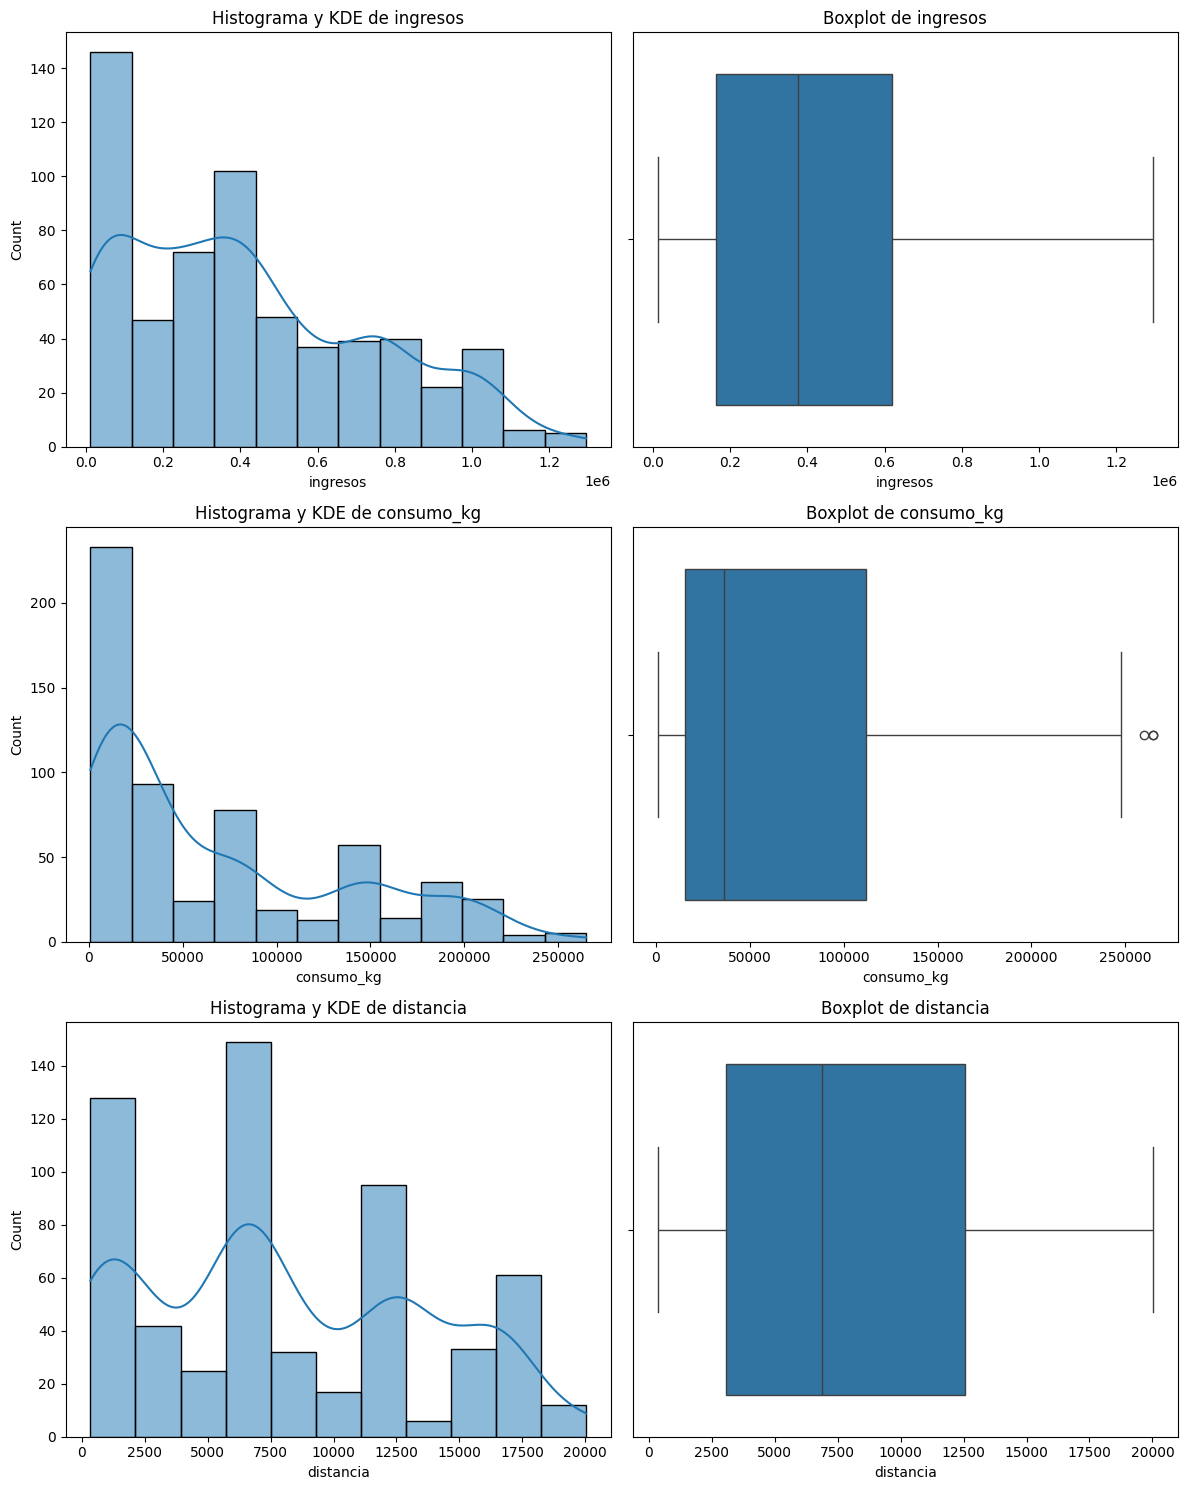

In [168]:
plot_combined_graphs(df_air_jun,["ingresos","consumo_kg","distancia"])

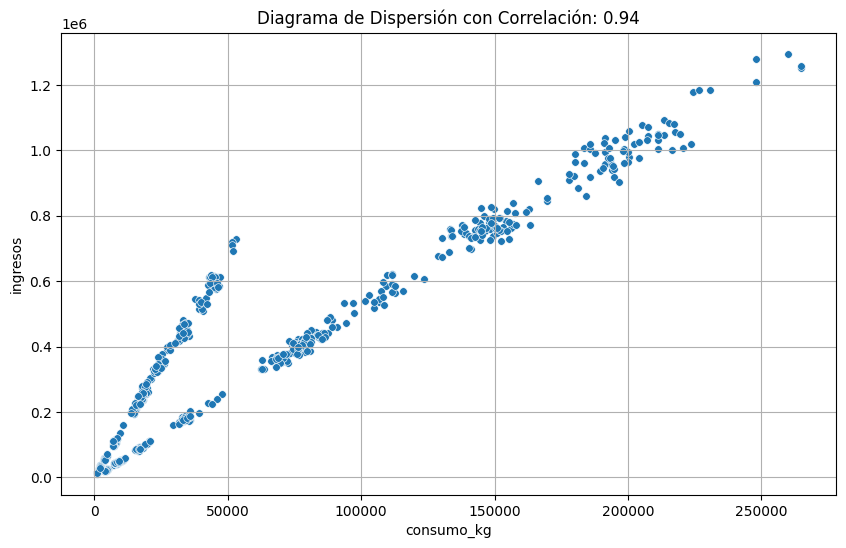

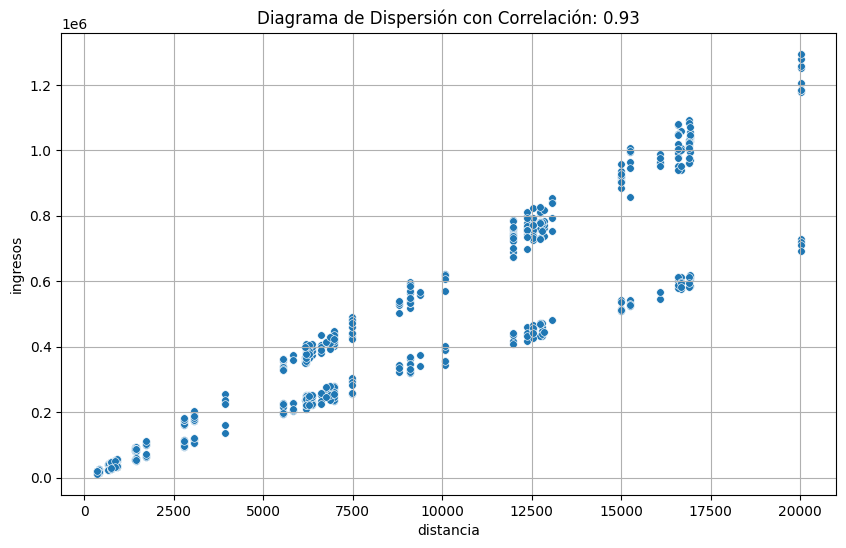

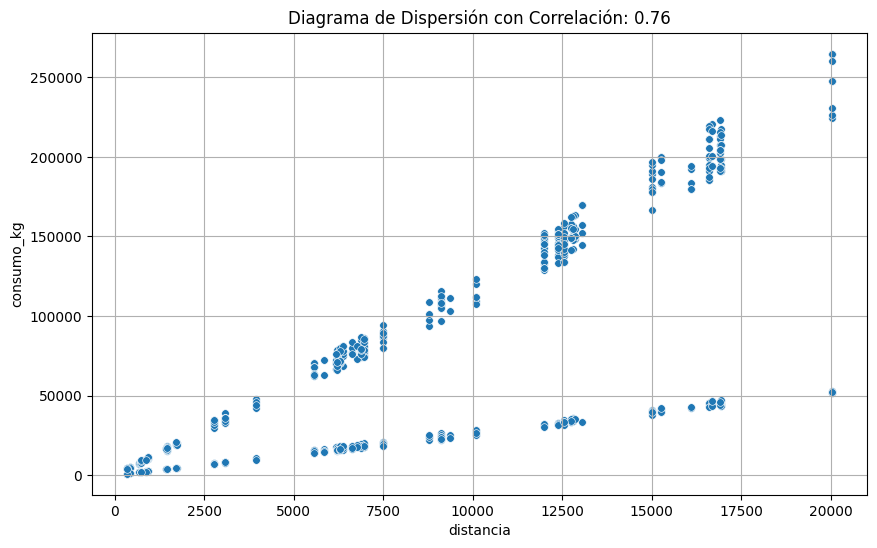

In [170]:
grafico_dispersion_con_correlacion(df_air_jun,"consumo_kg", "ingresos", mostrar_correlacion= True, tamano_puntos= 30)
grafico_dispersion_con_correlacion(df_air_jun,"distancia","ingresos", mostrar_correlacion= True, tamano_puntos= 30)
grafico_dispersion_con_correlacion(df_air_jun,"distancia","consumo_kg", mostrar_correlacion= True, tamano_puntos= 30)

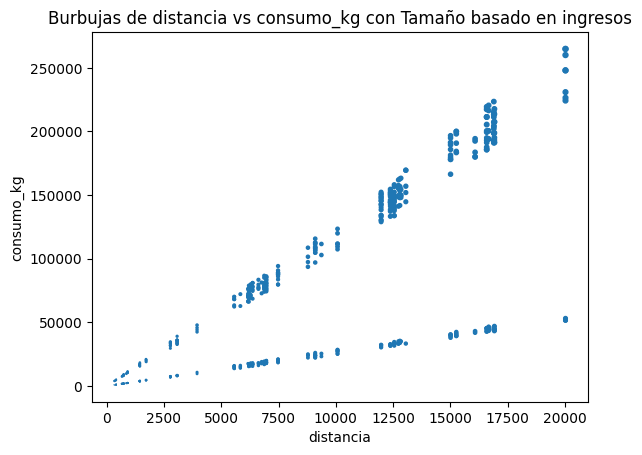

In [171]:
bubble_plot(df_air_jun,"distancia","consumo_kg","ingresos", scale = 100000)

- La correlación entre distancia y consumo se ve clara.
- Hay una linea de vuelos mucho más eficiente a la hora de consumir menos

### #2.3

Crea una variable categorica "cat_vuelo" a partir de distancias, escoge los rangos de las categorías basándote en la distribución de valores de "distancia" (sugerencia entre 3 y 4 categorías). Extra: Reaiza ahora otra vez el análisis multivariante "cat_vuelo", "ingresos", "consumo_kg". ¿Ves algo diferente?

(2,)


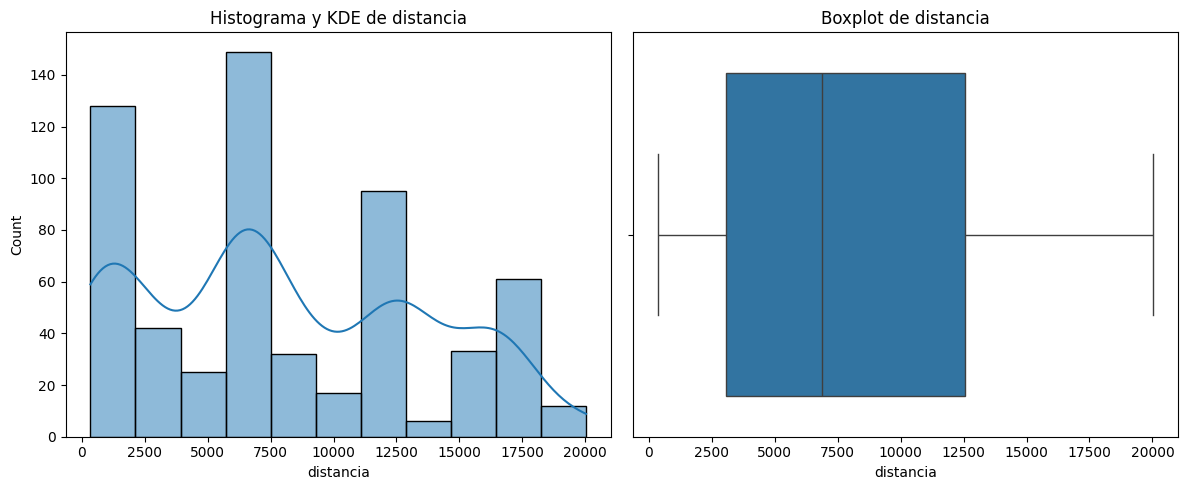

count      600.000000
mean      8071.003333
std       5550.244086
min        344.000000
25%       3073.000000
50%       6877.000000
75%      12553.000000
max      20029.000000
Name: distancia, dtype: float64

In [174]:
plot_combined_graphs(df_air_jun,["distancia"])
df_air_jun["distancia"].describe()

In [178]:
df_air_jun["cat_vuelo"] = pd.cut(df_air_jun["distancia"], bins=[0, 3000, 6000, 12000, df_air_jun["distancia"].max() ], labels=["Cat1", "Cat2", "Cat3", "Cat4"])

df_air_jun["cat_vuelo"].value_counts()

cat_vuelo
Cat3    214
Cat4    184
Cat1    146
Cat2     56
Name: count, dtype: int64

Respuesta Cat1:


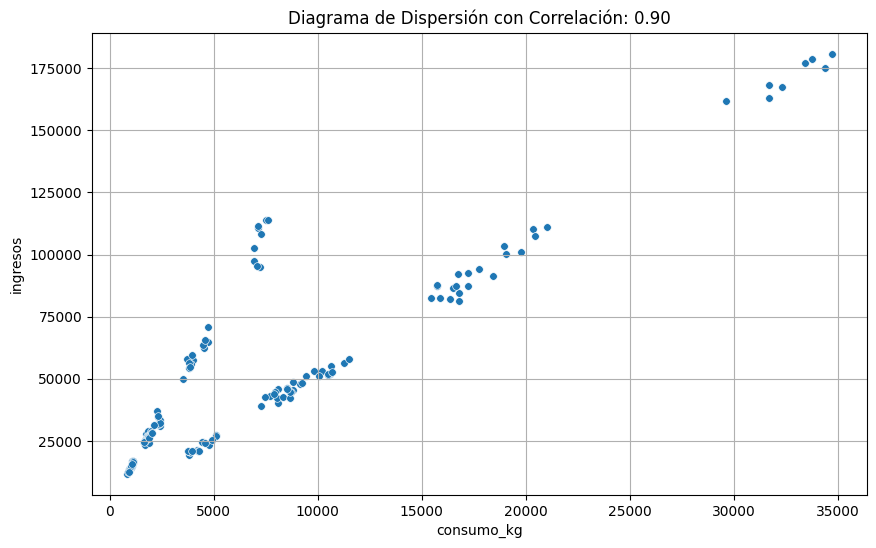

Respuesta Cat4:


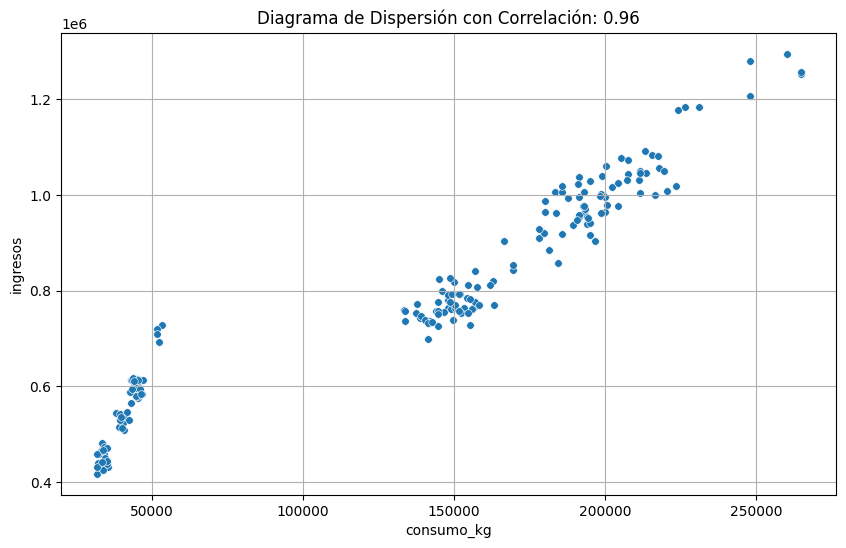

Respuesta Cat3:


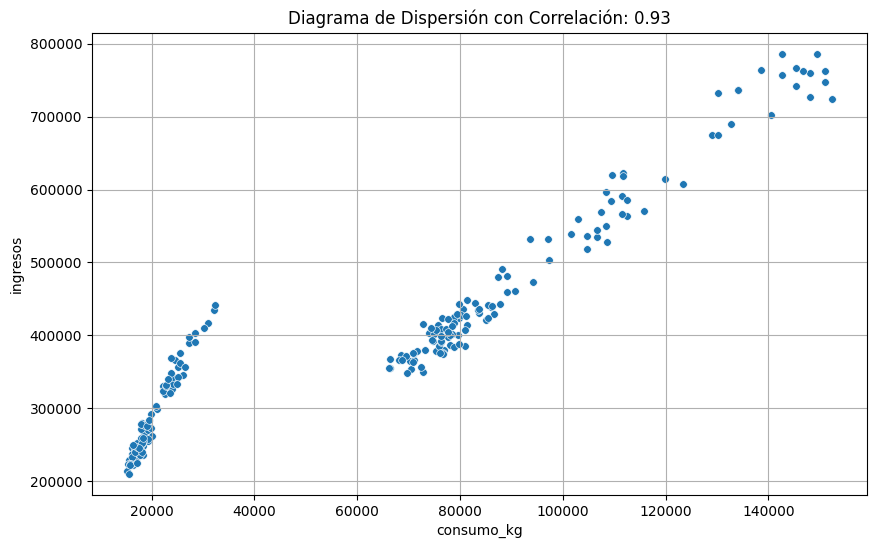

Respuesta Cat2:


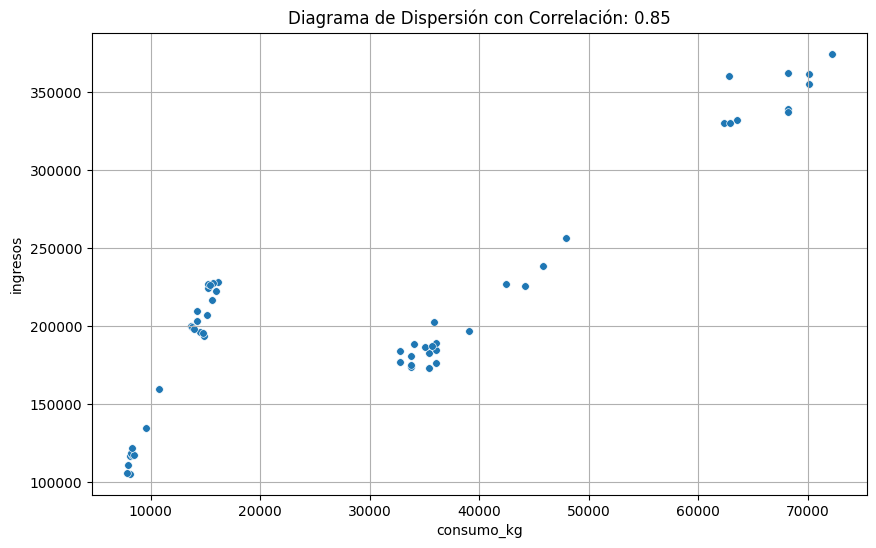

In [179]:
columnas = ["cat_vuelo", "ingresos", "consumo_kg"]
col_directora = "cat_vuelo"
col_1 = "ingresos"
col_2 = "consumo_kg"
diccionario_multivariante = {}
for valor in df_air_jun[col_directora].unique():
    diccionario_multivariante[valor] = df_air_jun.loc[df_air_jun[col_directora] == valor,[col_2,col_1]] 
for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    grafico_dispersion_con_correlacion(df_datos,col_2,col_1, tamano_puntos=30, mostrar_correlacion= True)

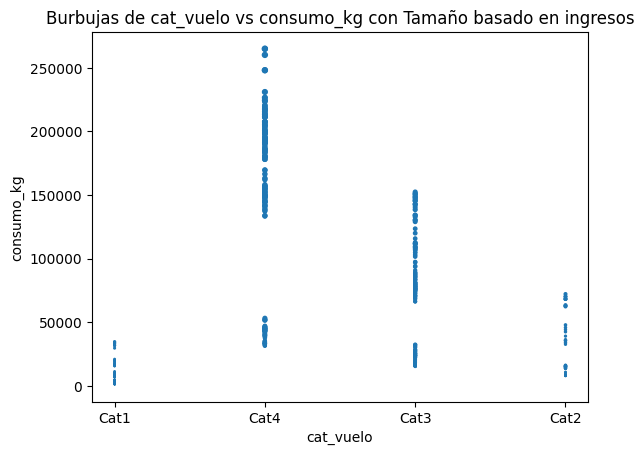

In [180]:
bubble_plot(df_air_jun,"cat_vuelo","consumo_kg","ingresos", scale = 100000)

### Extra:

#1 Consejos para encontrar "objetivos":

Si partes de un dataset que te parece interesante pero sin pregruntras claras, haz como hicimos con el dataset de Aviones. Describe, prioriza a ojo tus variables, realiza un análisis univariante completo, realiza un análisis bivariante ente las parejas de variables que te parecieron más intereantes. Llegados a este punto si el dataset tiene riqueza informativa, algo diferente tiene que haber aparecido (otra cosa es que sea interesante para ti :-)).  

Fíjate en lo que encontramos en el dataset de viajes: la empresa de más vuelos es la que menos ingresos tiene o la existencia clara de una línea de vuelos más eficientes en consumo que otros y otra de mayor ingresos por consumo. Lo siguiente es explorar esos puntos normalmente intentando contestar a: ¿por qué pasa?¿dónde,cuándo o cómo pasa?  

Busca esas "notas discordantes" en tu dataset, ya de por sí son mensajes del análisis. Ordénalas por importancia (importancia = impactan en ingresos, impactan en la calidad de la vida de las personas, impactan en el coste y poco más hay) e intenta entender por qué suceden esas notas discordantes, cómo solucionarlas o aprovecharlas y ya tienes objeetivos para el EDA; incluso si no encuentras respuesta siempre tendras esas notas discordantes, la conclusión de que no se puede avanzar con los datos que se tienen y los próximos pasos de encontrar más información para explicar lo que ocurre.

#2 Contestando a las preguntas de "Viajes".

- Necesitamos identificar esas líneas eficientes, para ello crea una variable que mida el ingreso por kilogramo consumido y otra que mida el kilogramo consumido por kilómetro. Haz el análisis univariante de las mismas intentando encontrar una diferencia clara entre viajes eficientes y no eficientes (que sabemos que existe). Fija un umbral para indicar si un viaje es supereficiente o si no lo es
- Crea esa variable de eficiencia binaria de eficiencia.
- Ahora haz el análisis bivariante de esa eficiencia y las compañías aéreas (queremos ver si realmente eso explica la situación de TabarAir). 
- Para nota: Hacer los análisis multivariante por compañía, eficiencia, tipo de avión y compañía, eficiencia, destino e incluso el de compañía, eficiencia, origen, destino.
- Con todo ello deberías poder encontrar si hay respuesta a la situación de TabarAir además de poder mostrar otros datos interesantes.